# **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech**

- Nama: Riza Isna Khoirun Nisa
- Email: rizaisna.rikn@gmail.com
- Id Dicoding: rizaisnakhoir

## **Persiapan**

### **Menyiapkan library yang dibutuhkan**

In [1]:
import pandas as pd # library for data manipulation and analysis
import numpy as np # library for numerical computations
import joblib # library for saving and loading models

import matplotlib.pyplot as plt # library for data visualization
import seaborn as sns # library for statistical data visualization

from sklearn.ensemble import RandomForestClassifier # random Forest classifier
from sklearn.preprocessing import LabelEncoder, StandardScaler # label encoding for categorical variables and standardizing features
from sklearn.model_selection import train_test_split # function for splitting data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # functions for model evaluation

from imblearn.over_sampling import SMOTE # function for oversampling the minority class

### **Menyiapkan data yang akan digunakan**

## **Data Understanding**

In [2]:
df = pd.read_csv('data/data.csv', delimiter=';') # loading the dataset
df.info() # displaying the structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [3]:
df.describe() # displays summary statistics

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [4]:
df.describe(include=['object']) # displays summary statistics for categorical columns

,Status
count,4424
unique,3
top,Graduate
freq,2209


In [5]:
df.sample(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
4084,2,39,1,9147,1,1,130.0,1,1,19,...,0,5,0,0,0.000,0,12.7,3.7,-1.70,Dropout
3441,1,1,1,9670,1,1,120.0,1,38,19,...,0,6,11,5,13.625,0,10.8,1.4,1.74,Enrolled
4141,1,7,1,9070,1,3,133.1,1,3,5,...,0,3,3,1,16.000,0,7.6,2.6,0.32,Dropout
3996,1,1,1,9853,1,1,128.0,1,1,1,...,0,6,13,2,12.000,0,12.7,3.7,-1.70,Dropout
3824,1,1,1,9119,1,1,142.0,1,1,38,...,0,5,6,1,15.000,0,10.8,1.4,1.74,Enrolled


In [6]:
df_prep = df.copy()

In [7]:
# list numerical features except specified columns
exclude_features = [
  'Marital_status', 'Application_mode', 'Application_order', 'Course',
  'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality',
  'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
  'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
  'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]
numerical_features = [col for col in df_prep.select_dtypes(include=['int64','float64']).columns if col not in exclude_features]
print('List of numerical featues {}'.format(numerical_features))

List of numerical featues ['Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']


In [8]:
# list categorical features
categorical_features = [col for col in df_prep.columns if col not in numerical_features]
print('List of categorical features {}'.format(categorical_features))

List of categorical features ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International', 'Status']


In [9]:
# define the label/target
label = 'Status'

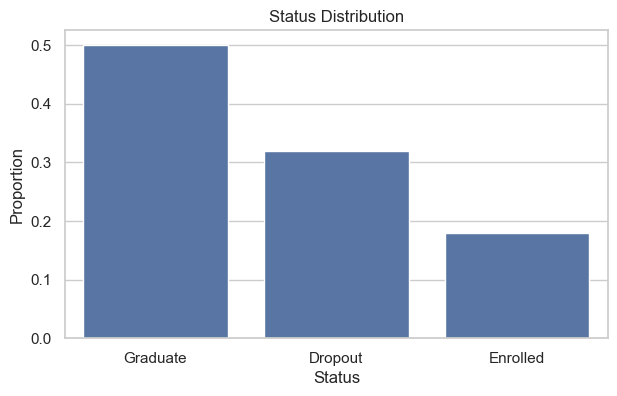

In [10]:
# calculate status rates
status_rates = df_prep['Status'].value_counts(normalize=True).round(2)

# convert to DataFrame
status_df = pd.DataFrame(status_rates).T

# plot the status rates
sns.set(style='whitegrid')
plt.figure(figsize=(7,4))  # Adjusting figure size for better visibility
ax = sns.barplot(x=status_rates.index, y=status_rates.values)

# formatting the plot
plt.title('Status Distribution')
plt.ylabel('Proportion')
plt.xlabel('Status')

# Show the plot
plt.show()

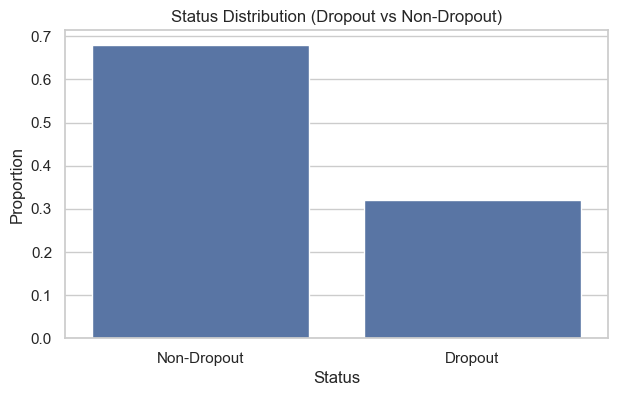

In [11]:
# Combine 'Enrolled' and 'Graduate' into 'Non-Dropout'
df_prep['Status'] = df_prep['Status'].replace({'Enrolled': 'Non-Dropout', 'Graduate': 'Non-Dropout', 'Dropout': 'Dropout'})

# Calculate the proportion of the new status
status_rates_mod = df_prep['Status'].value_counts(normalize=True).round(2)

# Plot the distribution of the new status
sns.set(style='whitegrid')
plt.figure(figsize=(7,4))
ax = sns.barplot(x=status_rates_mod.index, y=status_rates_mod.values)

plt.title('Status Distribution (Dropout vs Non-Dropout)')
plt.ylabel('Proportion')
plt.xlabel('Status')
plt.show()


## **Data Preparation / Preprocessing**

In [12]:
df_prep.isna().sum() # checking for missing values

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [13]:
df_prep.duplicated().sum() # checking for duplicate rows

np.int64(0)

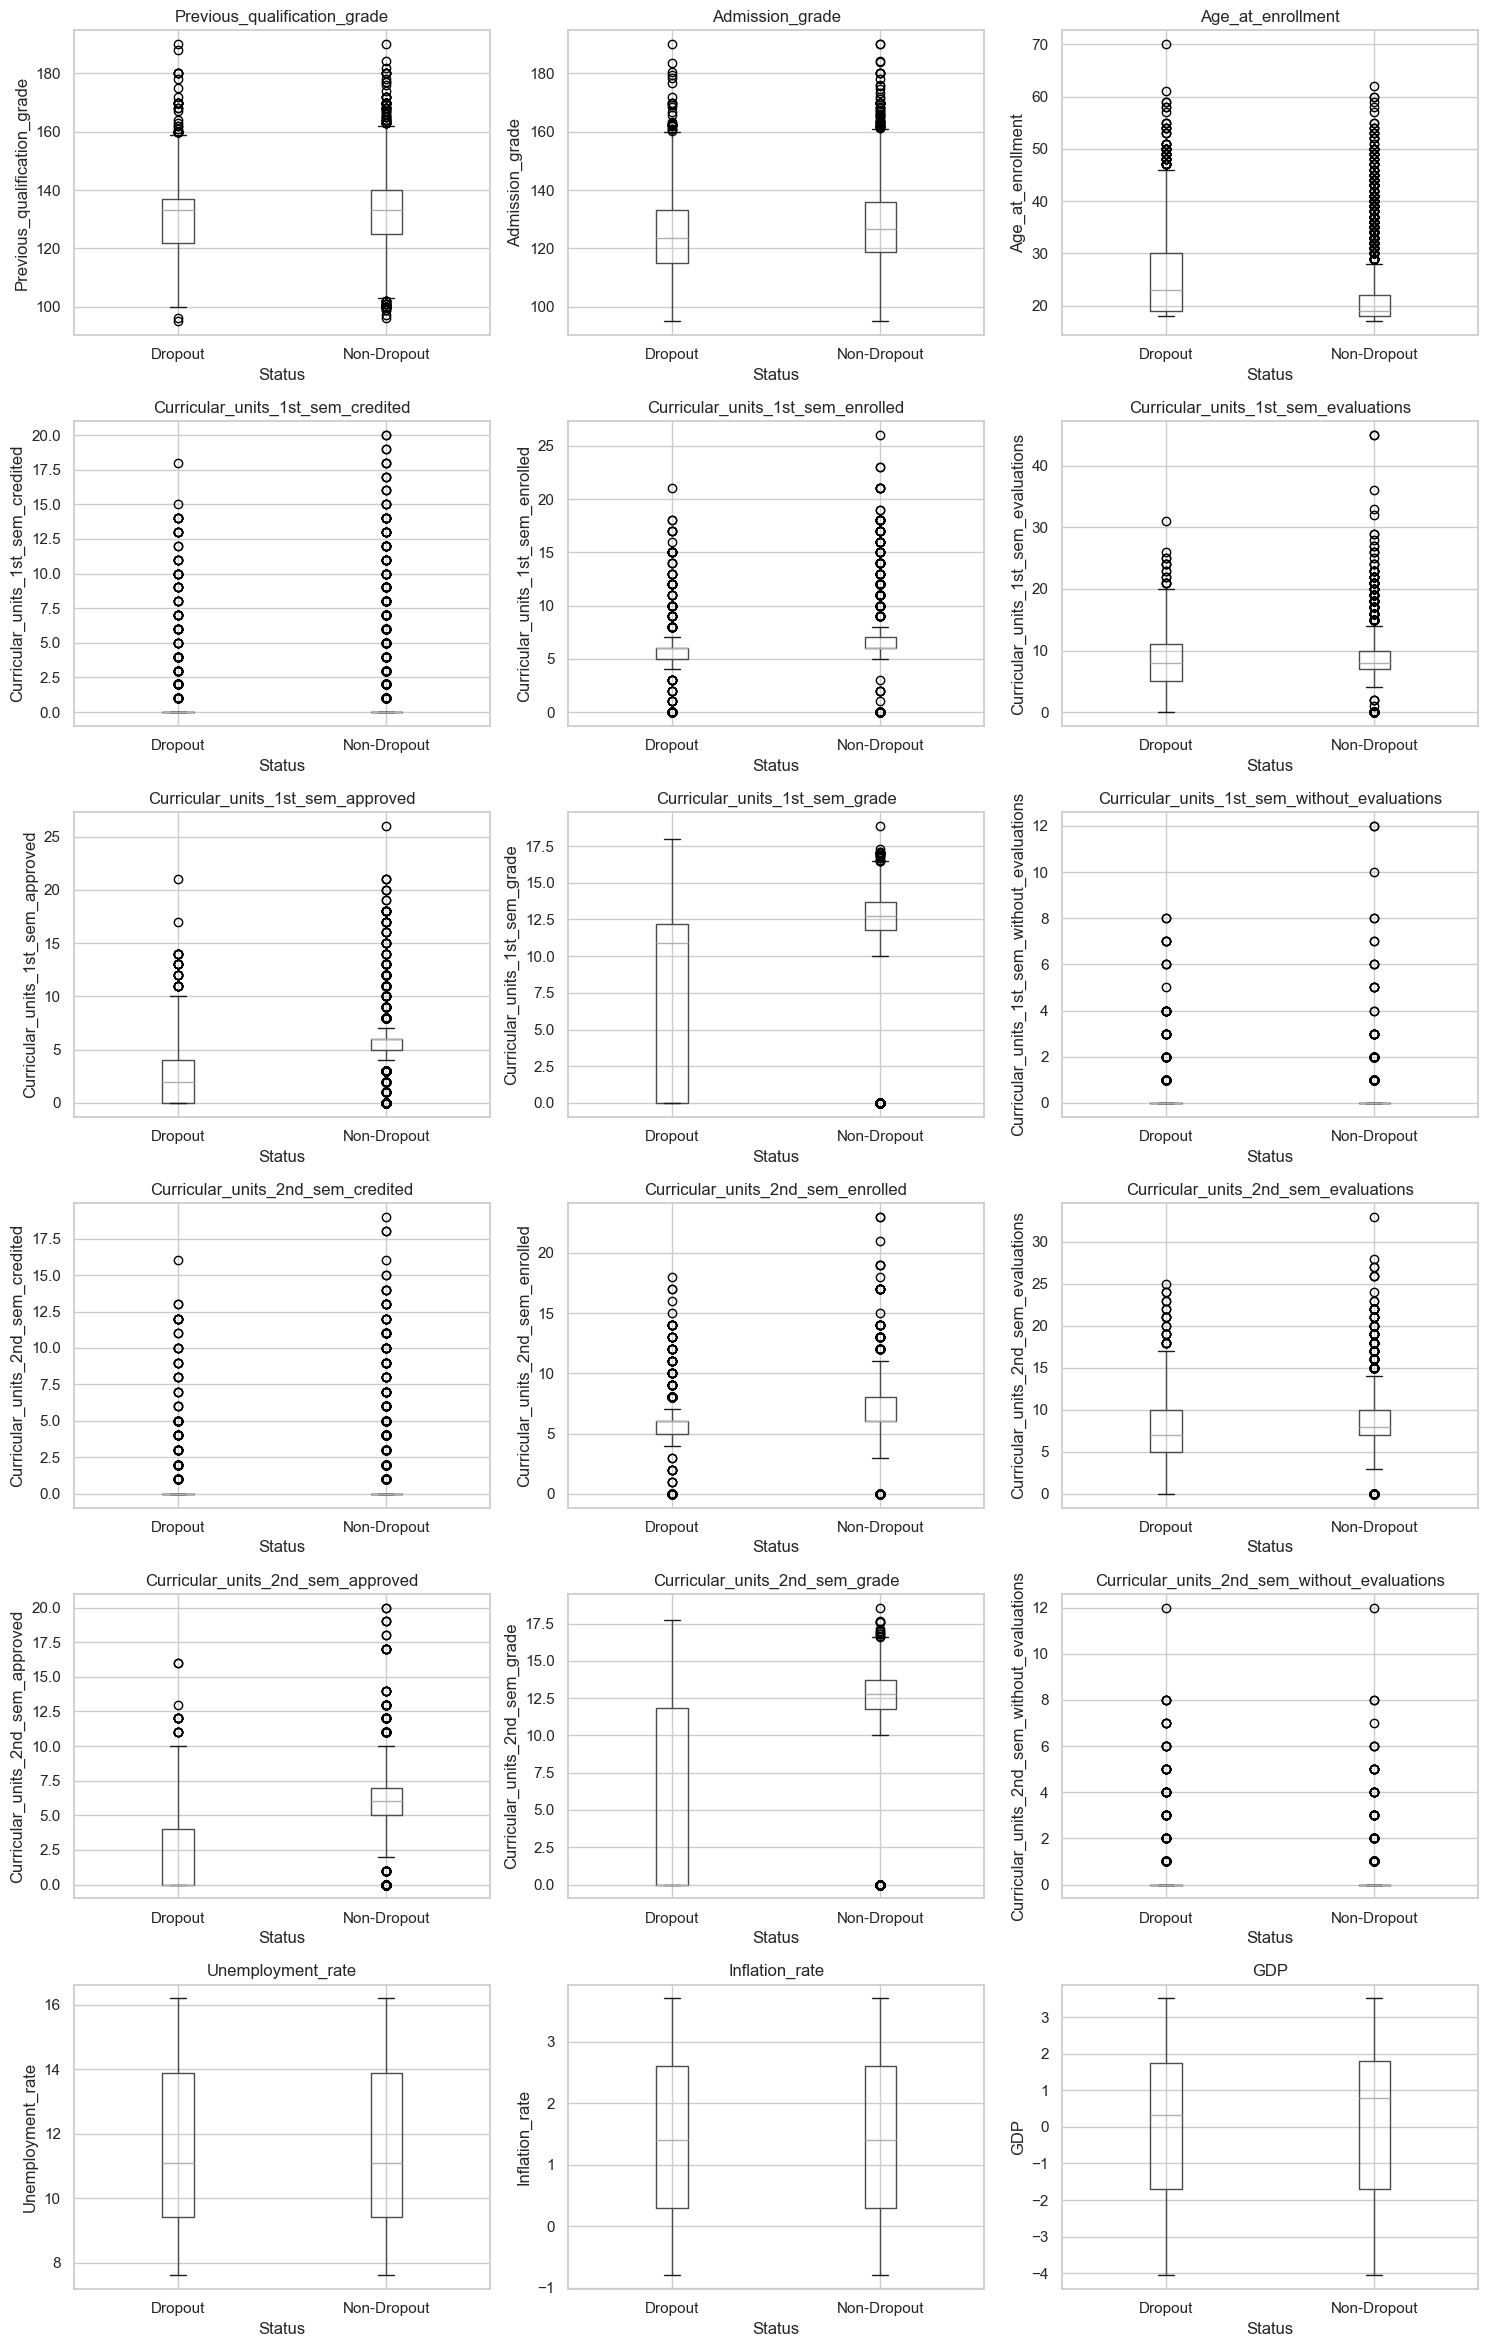

In [14]:
# number of numerical features
num_features = len(numerical_features)

# determine the number of rows based on 3 columns
n_cols = 3
n_rows = (num_features + 1) // n_cols  # rounding up

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    df_prep.boxplot(column=col, by='Status', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Status')
    axes[i].set_ylabel(col)

# remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('')
plt.show()

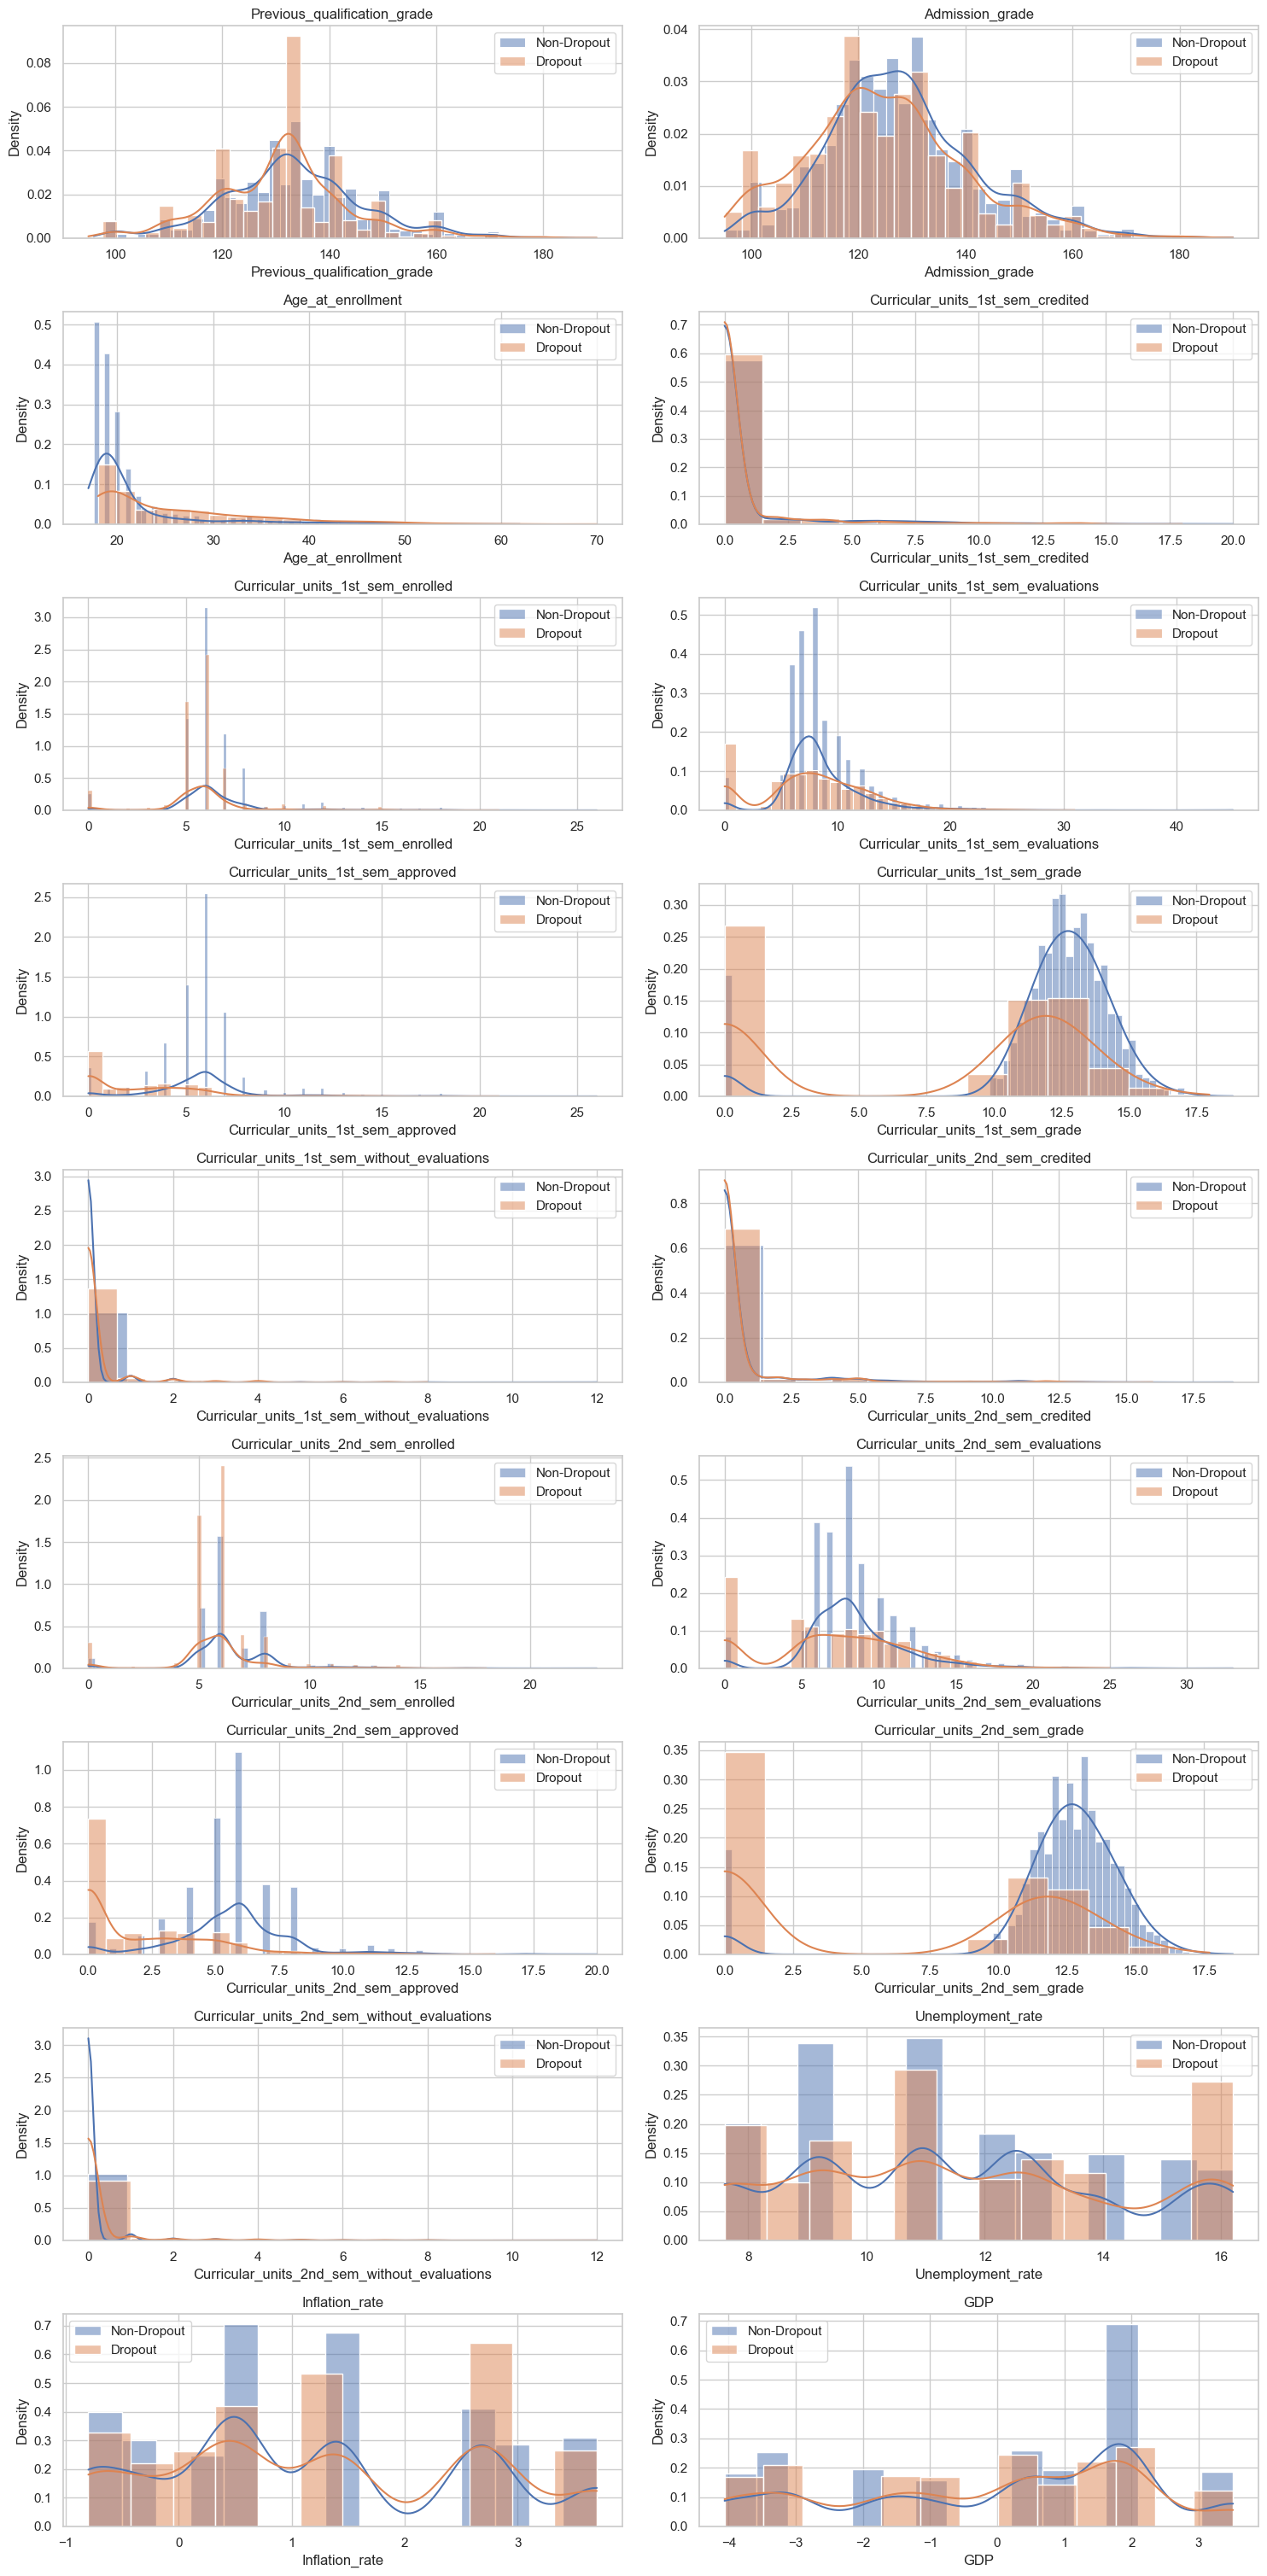

In [15]:
# plotting the distribution of numerical features untuk status Dropout dan Non-Dropout
fig = plt.figure(figsize=[15, 60])
fig.subplots_adjust(top=2)

for i, feature in enumerate(numerical_features):
  ax = fig.add_subplot(18, 2, i + 1)
  
  sns.histplot(data=df[df['Status'] != 'Dropout'], x=feature, ax=ax, kde=True, label='Non-Dropout', stat="density")
  sns.histplot(data=df[df['Status'] == 'Dropout'], x=feature, ax=ax, kde=True, label='Dropout', stat="density")
  
  ax.set_title(feature, fontsize=12)
  ax.legend(fontsize=11)

plt.tight_layout()

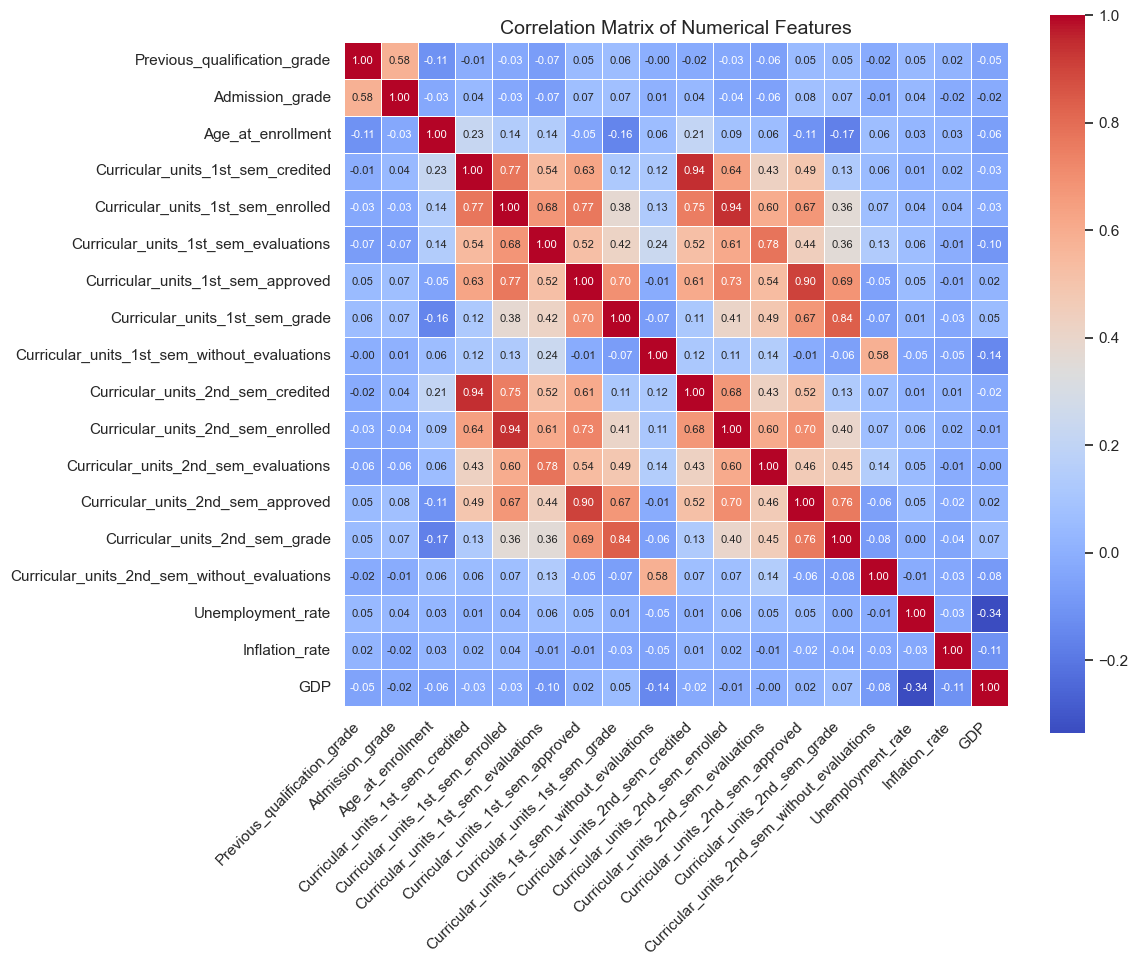

In [16]:
correlation_matrix = df_prep[numerical_features].corr()

# plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, 
            annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

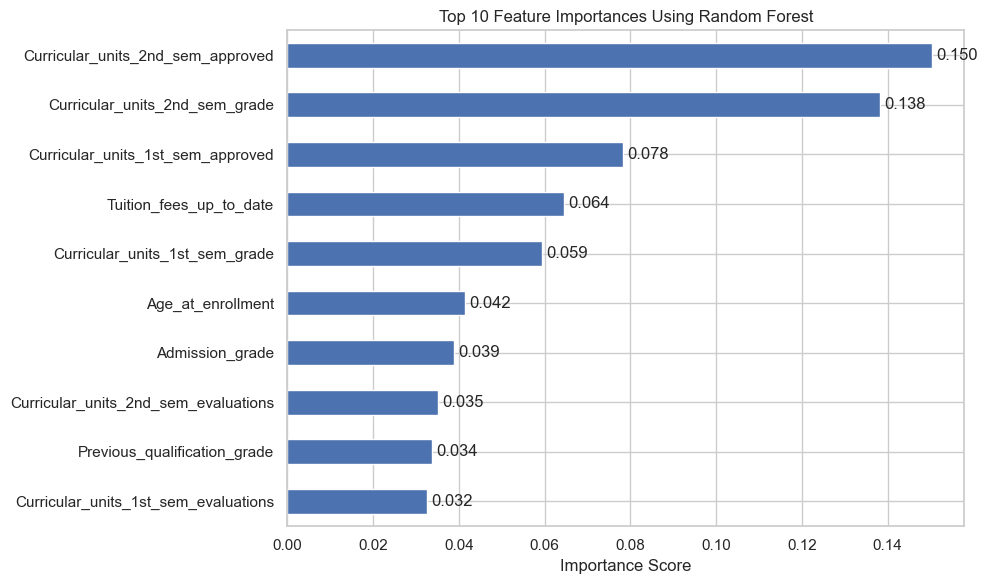

In [17]:
# encode categorical variables
for col in df_prep.select_dtypes(include='object').columns:
    df_prep[col] = LabelEncoder().fit_transform(df_prep[col])

X = df_prep.drop('Status', axis=1)
y = df_prep['Status']

# stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

# visualize with value annotations
plt.figure(figsize=(10, 6))
ax = top_features.plot(kind='barh')
plt.title('Top 10 Feature Importances Using Random Forest')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()

# add values to the bars
for i, (value, name) in enumerate(zip(top_features.values, top_features.index)):
    plt.text(value + 0.001, i, f'{value:.3f}', va='center')  # adjust 0.001 as needed

plt.tight_layout()
plt.show()

## **Modeling**

In [18]:
df_modeling = df_prep.copy()

In [19]:
# separate features and target variable
X = df_modeling.drop('Status', axis=1)
y = df_modeling['Status']

# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# model training
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

## **Evaluation**

Accuracy: 0.8598870056497175

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       316
           1       0.88      0.91      0.89       569

    accuracy                           0.86       885
   macro avg       0.85      0.84      0.84       885
weighted avg       0.86      0.86      0.86       885



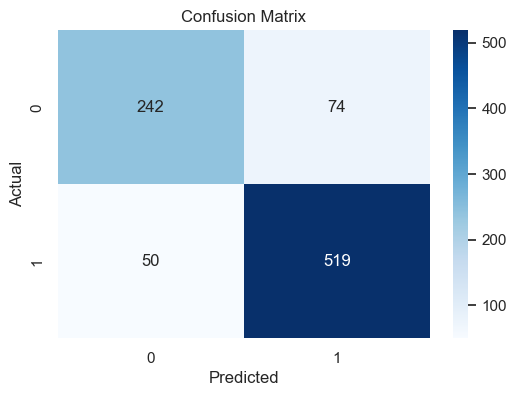

In [21]:
# test the model
y_pred = model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
# save the model
# joblib.dump(model, 'model.pkl')

In [23]:
# save the data
df_modeling.to_csv('data/data_cleaned.csv', index=False)

## **Top 10 Features Only**

In [24]:
# Select the top 10 most important features
top10_features = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Tuition_fees_up_to_date',
    'Curricular_units_1st_sem_grade',
    'Age_at_enrollment',
    'Admission_grade',
    'Curricular_units_2nd_sem_evaluations',
    'Previous_qualification_grade',
    'Curricular_units_1st_sem_evaluations'
]

In [25]:
# separate features and target variable
X = df_modeling[top10_features]
y = df_modeling['Status']

# scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# model training
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [27]:
# test the model
y_pred = model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8429378531073446

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       316
           1       0.86      0.90      0.88       569

    accuracy                           0.84       885
   macro avg       0.83      0.82      0.83       885
weighted avg       0.84      0.84      0.84       885



In [28]:
# save the model
joblib.dump(model, 'model.pkl')

['model.pkl']

## **Dataset for Dashboard**

In [29]:
df_modeling.info()  # display the structure of the cleaned dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [30]:
df_modeling.sample(5)  # display a sample of the cleaned dataset

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
3247,1,17,5,9085,1,1,118.0,1,1,38,...,0,6,7,6,13.500000,0,13.9,-0.3,0.79,1
412,1,1,3,9500,1,1,128.0,1,1,1,...,0,8,9,7,14.071429,0,13.9,-0.3,0.79,1
622,1,17,5,9853,1,1,117.0,1,38,38,...,0,6,10,4,10.250000,0,9.4,-0.8,-3.12,0
3206,1,1,1,9147,1,1,146.0,1,5,1,...,0,5,6,5,13.333333,0,16.2,0.3,-0.92,1
884,1,16,2,9500,1,1,127.0,1,2,38,...,0,8,12,7,12.600000,0,10.8,1.4,1.74,1


In [31]:
df_dashboard = df_modeling.copy() # make a copy for dashboard use

In [32]:
categorical_mappings = {
    'Marital_status': {
        1: 'single', 2: 'married', 3: 'widower', 4: 'divorced', 5: 'facto union', 6: 'legally separated', 9: 'other'
    },
    'Application_mode': {
        1: '1st phase - general contingent', 2: 'Ordinance No. 612/93', 5: '1st phase - special contingent (Azores Island)', 
        7: 'Holders of other higher education courses', 10: 'Initial training of teachers', 
        15: 'Change of course institution', 16: 'Change of institution/course', 17: 'Short cycle diploma holders', 
        18: 'Change of institution/course (International)', 26: 'Special contingent (Madeira Island)', 
        39: 'International student (bachelor)', 42: 'Transfer', 43: 'Technological specialization diploma holders', 
        44: 'Change of institution/course (1st cycle)', 51: 'Short cycle diploma (CET)', 
        53: 'Change of institution/course (CET)', 57: 'Change of institution/course (international student)', 
        58: 'Change of institution/course (change of regime)'
    },
    'Application_order': {
        1: '1st choice', 2: '2nd choice', 3: '3rd choice', 4: '4th choice', 5: '5th choice', 6: '6th choice', 7: 'other'
    },
    'Course': {
        33: 'Biofuel Production Technologies', 171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening)', 9003: 'Agronomy', 9070: 'Communication Design',
        9085: 'Veterinary Nursing', 9119: 'Informatics Engineering', 9130: 'Equinculture',
        9147: 'Management', 9238: 'Social Service', 9254: 'Tourism', 9500: 'Nursing',
        9556: 'Oral Hygiene', 9670: 'Advertising and Marketing Management', 9773: 'Journalism and Communication',
        9853: 'Basic Education', 9991: 'Management (evening)', 9992: 'Tourism (evening)'
    },
    'Daytime_evening_attendance': {
        1: 'daytime', 0: 'evening'
    },
    'Previous_qualification': {
        1: 'secondary education', 2: 'higher education - bachelor', 4: '12th year of schooling - not completed',
        5: 'basic education 3rd cycle (9th/10th/11th year)', 6: 'technological specialization course',
        9: 'other', 10: 'technological specialization course (CET)', 12: 'higher education - master'
    },
    'Nacionality': {
        1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch', 14: 'Cape Verdean',
        17: 'Angolan', 21: 'Guinean', 22: 'Mozambican', 24: 'Santomean', 25: 'Turkish',
        26: 'Brazilian', 32: 'Romanian', 41: 'Moldova (Republic of)', 62: 'Ukrainian',
        100: 'Lithuanian', 101: 'Cape Verdean (foreign)', 103: 'Spanish (foreign)'
    },
    'Mothers_qualification': {
        1: 'secondary education', 2: 'higher education - bachelor', 3: 'basic education 3rd cycle',
        4: '12th year of schooling - not completed', 5: 'basic education 2nd cycle',
        6: 'technological specialization', 9: 'other', 10: 'unknown', 11: 'higher education - master',
        12: 'higher education - doctorate'
    },
    'Fathers_qualification': {
        1: 'secondary education', 2: 'higher education - bachelor', 3: 'basic education 3rd cycle',
        4: '12th year of schooling - not completed', 5: 'basic education 2nd cycle',
        6: 'technological specialization', 9: 'other', 10: 'unknown', 11: 'higher education - master',
        12: 'higher education - doctorate'
    },
    'Mothers_occupation': {
        0: 'other', 1: 'representatives of the legislative power and executive bodies',
        2: 'specialists in intellectual and scientific activities', 3: 'intermediate level technicians',
        4: 'administrative staff', 5: 'personal services, security and safety workers',
        6: 'farmers and skilled workers in agriculture, fisheries, and forestry',
        7: 'skilled workers in industry, construction, and craftsmen', 8: 'installation and machine operators',
        9: 'elementary occupations', 10: 'armed forces professions'
    },
    'Fathers_occupation': {
        0: 'other', 1: 'representatives of the legislative power and executive bodies',
        2: 'specialists in intellectual and scientific activities', 3: 'intermediate level technicians',
        4: 'administrative staff', 5: 'personal services, security and safety workers',
        6: 'farmers and skilled workers in agriculture, fisheries, and forestry',
        7: 'skilled workers in industry, construction, and craftsmen', 8: 'installation and machine operators',
        9: 'elementary occupations', 10: 'armed forces professions'
    },
    'Displaced': {
        1: 'yes', 0: 'no'
    },
    'Educational_special_needs': {
        1: 'yes', 0: 'no'
    },
    'Debtor': {
        1: 'yes', 0: 'no'
    },
    'Tuition_fees_up_to_date': {
        1: 'yes', 0: 'no'
    },
    'Gender': {
        1: 'male', 0: 'female'
    },
    'Scholarship_holder': {
        1: 'yes', 0: 'no'
    },
    'International': {
        1: 'yes', 0: 'no'
    },
    'Status': {
        0: 'dropout', 1: 'non-dropout'
    }
}


In [33]:
df_dashboard['Marital_status'] = df_dashboard['Marital_status'].map(categorical_mappings['Marital_status'])
df_dashboard['Application_mode'] = df_dashboard['Application_mode'].map(categorical_mappings['Application_mode'])
df_dashboard['Application_order'] = df_dashboard['Application_order'].map(categorical_mappings['Application_order'])
df_dashboard['Course'] = df_dashboard['Course'].map(categorical_mappings['Course'])
df_dashboard['Daytime_evening_attendance'] = df_dashboard['Daytime_evening_attendance'].map(categorical_mappings['Daytime_evening_attendance'])
df_dashboard['Previous_qualification'] = df_dashboard['Previous_qualification'].map(categorical_mappings['Previous_qualification'])
df_dashboard['Nacionality'] = df_dashboard['Nacionality'].map(categorical_mappings['Nacionality'])
df_dashboard['Mothers_qualification'] = df_dashboard['Mothers_qualification'].map(categorical_mappings['Mothers_qualification'])
df_dashboard['Fathers_qualification'] = df_dashboard['Fathers_qualification'].map(categorical_mappings['Fathers_qualification'])
df_dashboard['Mothers_occupation'] = df_dashboard['Mothers_occupation'].map(categorical_mappings['Mothers_occupation'])
df_dashboard['Fathers_occupation'] = df_dashboard['Fathers_occupation'].map(categorical_mappings['Fathers_occupation'])
df_dashboard['Displaced'] = df_dashboard['Displaced'].map(categorical_mappings['Displaced'])
df_dashboard['Educational_special_needs'] = df_dashboard['Educational_special_needs'].map(categorical_mappings['Educational_special_needs'])
df_dashboard['Debtor'] = df_dashboard['Debtor'].map(categorical_mappings['Debtor'])
df_dashboard['Tuition_fees_up_to_date'] = df_dashboard['Tuition_fees_up_to_date'].map(categorical_mappings['Tuition_fees_up_to_date'])
df_dashboard['Gender'] = df_dashboard['Gender'].map(categorical_mappings['Gender'])
df_dashboard['Scholarship_holder'] = df_dashboard['Scholarship_holder'].map(categorical_mappings['Scholarship_holder'])
df_dashboard['International'] = df_dashboard['International'].map(categorical_mappings['International'])
df_dashboard['Status'] = df_dashboard['Status'].map(categorical_mappings['Status'])

In [34]:
df_dashboard.info()  # display the structure of the dashboard dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4423 non-null   object 
 2   Application_order                             4422 non-null   object 
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        3825 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4420 non-null   object 
 8   Mothers_qualification                         1720 non-null   object 
 9   Fathers_qualification                         1368 non-null   o

In [35]:
df_dashboard.head(5)  # display the first 5 rows of the dashboard dataset

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,Short cycle diploma holders,5th choice,Animation and Multimedia Design,daytime,secondary education,122.0,Portuguese,NaN,higher education - doctorate,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,dropout
1,single,Change of course institution,1st choice,Tourism,daytime,secondary education,160.0,Portuguese,secondary education,basic education 3rd cycle,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,non-dropout
2,single,1st phase - general contingent,5th choice,Communication Design,daytime,secondary education,122.0,Portuguese,NaN,NaN,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,dropout
3,single,Short cycle diploma holders,2nd choice,Journalism and Communication,daytime,secondary education,122.0,Portuguese,NaN,NaN,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,non-dropout
4,married,International student (bachelor),1st choice,Social Service (evening),evening,secondary education,100.0,Portuguese,NaN,NaN,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,non-dropout


In [36]:
# save the data
df_dashboard.to_csv('data/data_dashboard.csv', index=False)